In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import numpy as np

Reminder: Correlation is

$$
\rho= \frac{\operatorname{Cov[X,Y]}}{\sigma_X \sigma_Y}
$$

* Measurement of dependence between $X$ and $Y$

* $|\rho| \le 1$

* If $X$, $Y$ are s.i., then $\rho=0$

* $\rho =0$ does not necessarily imply $X$, $Y$, s.i.

* If $Y$ is a linear function of $X$ (and vice versa), then $\rho= \pm 1$



**Examples**

![Correlation Examples](Correlation_examples.pdf)

In [3]:
file=open("brfss17.pickle","rb")
df=pickle.load(file)
file.close()

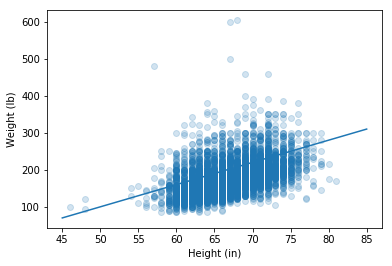

In [5]:
m=6
b=-200
x=np.linspace(45,85,100)
plt.scatter(df['HEIGHT'],df['WEIGHT2'],alpha=0.2)
plt.xlabel('Height (in)')
plt.ylabel('Weight (lb)')
plt.plot(x,m*x+b)

In [6]:
K=np.cov(df['HEIGHT'],df['WEIGHT2'])
K

array([[  17.7146933 ,   89.38995679],
       [  89.38995679, 2131.30006401]])

In [7]:
rho=K[1,0]/np.sqrt(K[0,0]*K[1,1])
rho

0.4600442527877239

In [9]:
m=rho*np.sqrt(K[1,1]/K[0,0])
m

5.046091133743838

In [10]:
np.mean(df['HEIGHT']),np.mean(df['WEIGHT2'])

(66.9842, 180.486)

In [12]:
b=np.mean(df['WEIGHT2'])-m*np.mean(df['HEIGHT'])
b

-157.522377720924

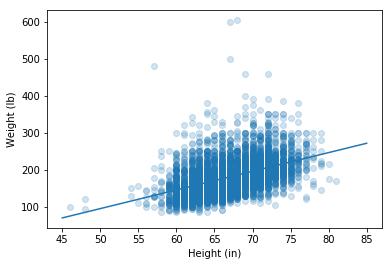

In [13]:
x=np.linspace(45,85,100)
plt.scatter(df['HEIGHT'],df['WEIGHT2'],alpha=0.2)
plt.xlabel('Height (in)')
plt.ylabel('Weight (lb)')
plt.plot(x,m*x+b)

In [14]:
import scipy.stats as stats

In [15]:
?stats.linregress

In [16]:
stats.linregress(df['HEIGHT'],df['WEIGHT2'])

LinregressResult(slope=5.046091133743837, intercept=-157.52237772092394, rvalue=0.4600442527877239, pvalue=2.0097474659963633e-260, stderr=0.1377588307210013)

In [19]:
D=np.array([df['HEIGHT']*2.54, df['WEIGHT2']/2.2])

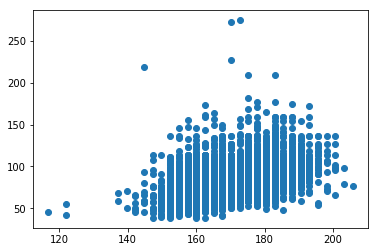

In [20]:
plt.scatter(D[0,:],D[1,:])

In [21]:
K=np.cov(D)
K

array([[114.28811529, 103.2047683 ],
       [103.2047683 , 440.3512529 ]])

In [22]:
l,U=np.linalg.eigh(K)

In [23]:
l #eigenvalues

array([ 84.36757442, 470.27179376])

In [24]:
U # modal matrix : cols are eigenvectors

array([[-0.96045115,  0.27844855],
       [ 0.27844855,  0.96045115]])

In [25]:
D2=U.T@D

In [26]:
np.cov(D2)

array([[ 8.43675744e+01, -5.18515683e-14],
       [-5.18515683e-14,  4.70271794e+02]])

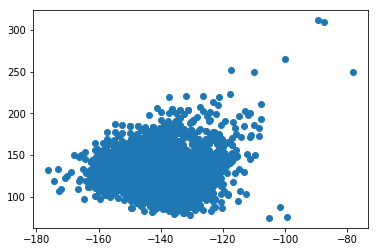

In [27]:
plt.scatter(D2[0,:], D2[1,:])

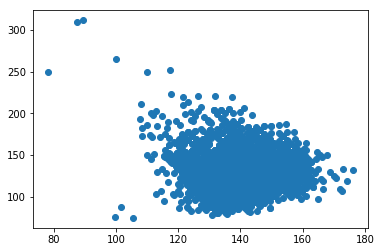

In [28]:
plt.scatter(-D2[0,:], D2[1,:])